In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rudradata/LLVIP/README.md
/kaggle/input/rudradata/LLVIP/visible/test/260531.jpg
/kaggle/input/rudradata/LLVIP/visible/test/190781.jpg
/kaggle/input/rudradata/LLVIP/visible/test/260088.jpg
/kaggle/input/rudradata/LLVIP/visible/test/220224.jpg
/kaggle/input/rudradata/LLVIP/visible/test/210421.jpg
/kaggle/input/rudradata/LLVIP/visible/test/230314.jpg
/kaggle/input/rudradata/LLVIP/visible/test/190081.jpg
/kaggle/input/rudradata/LLVIP/visible/test/230238.jpg
/kaggle/input/rudradata/LLVIP/visible/test/260444.jpg
/kaggle/input/rudradata/LLVIP/visible/test/240034.jpg
/kaggle/input/rudradata/LLVIP/visible/test/210100.jpg
/kaggle/input/rudradata/LLVIP/visible/test/240050.jpg
/kaggle/input/rudradata/LLVIP/visible/test/210395.jpg
/kaggle/input/rudradata/LLVIP/visible/test/200207.jpg
/kaggle/input/rudradata/LLVIP/visible/test/190266.jpg
/kaggle/input/rudradata/LLVIP/visible/test/210162.jpg
/kaggle/input/rudradata/LLVIP/visible/test/230102.jpg
/kaggle/input/rudradata/LLVIP/visible/test

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) 

# Input data paths
train_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/train' 
train_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/train'

validation_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/test'
validation_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/test' 


In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob

visible_image_paths = glob.glob('/kaggle/input/rudradata/LLVIP/visible/train/*.jpg')  # Update the pattern to match your file extension
infrared_image_paths = glob.glob('/kaggle/input/rudradata/LLVIP/infrared/train/*.jpg')  # Update the pattern to match your file extension

# Then continue with the code to create DataFrames and generators as previously shown.

# Define directories for visible and infrared images
visible_train_dir = '/kaggle/input/rudradata/LLVIP/visible/train'
infrared_train_dir = '/kaggle/input/rudradata/LLVIP/infrared/train'

# Example: Load visible and infrared images using pandas
# This assumes you have a list of file paths in a CSV file
# You might need to adjust this depending on your actual data organization

visible_df = pd.DataFrame({'filename': visible_image_paths})  # Replace 'visible_image_paths' with your visible image paths
infrared_df = pd.DataFrame({'filename': infrared_image_paths})  # Replace 'infrared_image_paths' with your infrared image paths

# Data generators for visible and infrared images
visible_datagen = ImageDataGenerator(rescale=1./255)  # Define your visible data augmentation here if needed
infrared_datagen = ImageDataGenerator(rescale=1./255)  # Define your infrared data augmentation here if needed

# Define visible and infrared generators using flow_from_dataframe
visible_generator = visible_datagen.flow_from_dataframe(
    visible_df,
    x_col='filename',
    target_size=(image_height, image_width),  # Define image height and width
    batch_size=batch_size,
    class_mode=None,  # Set to None as there are no classes
    shuffle=True,
)

infrared_generator = infrared_datagen.flow_from_dataframe(
    infrared_df,
    x_col='filename',
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode=None,
    shuffle=True,
)


In [ ]:



import cv2
import numpy as np
import os




from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances for visible and infrared images
visible_generator = ImageDataGenerator(rescale=1./255)
infrared_generator = ImageDataGenerator(rescale=1./255)

# Assuming your image folders are named 'visible' and 'infrared'
train_visible_generator = visible_generator.flow_from_directory('/kaggle/input/rudradata/LLVIP/visible/train',
                                                        batch_size=32,
                                                        class_mode='binary',
                                                        target_size=(256, 256))

train_infrared_generator = infrared_generator.flow_from_directory('/kaggle/input/rudradata/LLVIP/infrared/train',
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       target_size=(256, 256))

validation_visible_generator = visible_generator.flow_from_directory('/kaggle/input/rudradata/LLVIP/visible/test',
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       target_size=(256, 256),
                                                       shuffle=False)

validation_infrared_generator = infrared_generator.flow_from_directory('/kaggle/input/rudradata/LLVIP/infrared/test',
                                                       batch_size=32,
                                                       class_mode='binary',
                                                       target_size=(256, 256),
                                                       shuffle=False)

In [7]:
import torch
import torch.nn as nn
# Increase batch size in DataLoader
larger_batch_size = 256 # Define the desired batch size

train_loader = DataLoader(train_dataset, batch_size=larger_batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=larger_batch_size, shuffle=False)

train_loader = DataLoader(train_dataset, batch_size=larger_batch_size, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=larger_batch_size, shuffle=False)
from torch.utils.data import Subset
import numpy as np
subset_size = 200
batch_size=16
# Select a subset for training
subset_indices = np.random.choice(len(train_dataset), size=subset_size, replace=False)
train_subset = Subset(train_dataset, subset_indices)
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
validation_subset = Subset(validation_dataset, subset_indices)
validation_loader = DataLoader(validation_subset, batch_size=batch_size, shuffle=True)
class CNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CNN, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        # You can add more layers here if needed

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EncoderBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

class FusionModelBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(FusionModelBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DecoderBlock, self).__init__()
        self.conv_transpose = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv_transpose(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x
class FusionFeature(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(FusionFeature, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(out_channels)
        self.relu1 = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        return x

# Assuming EncoderBlock and DecoderBlock definitions remain the same

class FusionNet(nn.Module):
    def __init__(self):
        super(FusionNet, self).__init__()
    
        # Encoder blocks
        self.encoder1 = EncoderBlock(in_channels=6, out_channels=32)
        self.encoder2 = EncoderBlock(in_channels=32, out_channels=64)
        self.encoder3 = EncoderBlock(in_channels=64, out_channels=128)
        self.encoder4 = EncoderBlock(in_channels=128, out_channels=256)
        # Additional CNN block (adjust in_channels and out_channels as needed)
        self.additional_cnn = CNN(in_channels=256, out_channels=256)

        # Fusion model block (you might need to adjust in_channels and out_channels)
        self.fusion_model_block = FusionModelBlock(in_channels=256, out_channels=256)

        # Fusion feature block (adjust in_channels and out_channels as needed)
        self.fusion_feature = FusionFeature(in_channels=256, out_channels=256)

        # Decoder blocks
        self.decoder1 = DecoderBlock(in_channels=256, out_channels=128)
        self.decoder2 = DecoderBlock(in_channels=128, out_channels=64)
        self.decoder3 = DecoderBlock(in_channels=64, out_channels=32)
        self.decoder4 = DecoderBlock(in_channels=32, out_channels=16)
        self.final_conv = nn.Conv2d(16, 3, kernel_size=3, padding=1)

    def forward(self, ir, vis):
        
        x = torch.cat((ir, vis), dim=1)
        x = self.encoder1(x)
        x = self.encoder2(x)
        x = self.encoder3(x)
        x = self.encoder4(x)
        # Pass through the additional CNN block
        x = self.additional_cnn(x)

        # Apply fusion model block
        x = self.fusion_model_block(x)

        # Apply fusion feature block
        x = self.fusion_feature(x)

        # Decoder blocks
        x = self.decoder1(x)
        x = self.decoder2(x)
        x = self.decoder3(x)
        x = self.decoder4(x)
        output = self.final_conv(x)
        return output


import matplotlib.pyplot as plt
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
fusion_net = FusionNet()

# Move the model to the specified device
fusion_net = fusion_net.to(device)

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(fusion_net.parameters(), lr=0.001)

num_epochs = 7
# Assuming validation_loader is defined and loaded with validation data


In [7]:
class EarlyStopping:
    def __init__(self, patience=5, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_score = None
        self.early_stop = False
        self.counter = 0

    def __call__(self, val_loss):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
        elif score < self.best_score + self.delta:
            self.counter += 1
            print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.counter = 0


In [ ]:
# ... [previous code for setting up train_loader] ...
# Select a subset for validation
subset_indices = np.random.choice(len(validation_dataset), size=subset_size, replace=False)
validation_subset = Subset(validation_dataset, subset_indices)

# Create a new DataLoader for the subset
validation_loader = DataLoader(validation_subset, batch_size=batch_size, shuffle=False)

# ... [previous code for setting up train_loader, fusion_net, criterion, optimizer] ...

# Initialize lists to store losses
training_losses = []

# Training loop
for epoch in range(num_epochs):
    fusion_net.train()
    running_loss = 0.0
    for i, (infrared_imgs, visible_imgs) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = fusion_net(infrared_imgs, visible_imgs)
        loss = criterion(outputs, visible_imgs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        print(f"Batch {i + 1}, Loss: {loss.item()}")

    avg_train_loss = running_loss / len(train_loader)
    training_losses.append(avg_train_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Avg Training Loss: {avg_train_loss}")

# Initialize lists to store losses
validation_losses = []

# Validation loop
for epoch in range(num_epochs):
    fusion_net.eval()
    validation_loss = 0.0
    for i, (infrared_imgs, visible_imgs) in enumerate(validation_loader):
        outputs = fusion_net(infrared_imgs, visible_imgs)
        loss = criterion(outputs, visible_imgs)
        validation_loss += loss.item()
        print(f"Batch {i + 1}, Validation Loss: {loss.item()}")
    

    avg_val_loss = validation_loss / len(validation_loader)
    validation_losses.append(avg_val_loss)
    print(f"Epoch [{epoch + 1}/{num_epochs}], Avg Validation Loss: {avg_val_loss}")

import matplotlib.pyplot as plt

# Plot the training and validation losses
plt.figure(figsize=(10, 6))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()



Batch 1, Loss: 1.3844727277755737
Batch 2, Loss: 1.1447619199752808
Batch 3, Loss: 0.8683188557624817
Batch 4, Loss: 0.9380295872688293
Batch 5, Loss: 0.8664770126342773
Batch 6, Loss: 0.8024927973747253
Batch 7, Loss: 0.6997437477111816
Batch 8, Loss: 0.6395693421363831
Batch 9, Loss: 0.6050529479980469
Batch 10, Loss: 0.5947380661964417
Batch 11, Loss: 0.5840782523155212
Batch 12, Loss: 0.5858597755432129
Batch 13, Loss: 0.3943319022655487
Epoch [1/7], Avg Training Loss: 0.7775328411505773
Batch 1, Loss: 0.4282848536968231
Batch 2, Loss: 0.3789060115814209
Batch 3, Loss: 0.33917999267578125
Batch 4, Loss: 0.33108729124069214
Batch 5, Loss: 0.2754972279071808
Batch 6, Loss: 0.2709551453590393
Batch 7, Loss: 0.2519105076789856
Batch 8, Loss: 0.24647875130176544
Batch 9, Loss: 0.2455352544784546
Batch 10, Loss: 0.2870011627674103
Batch 11, Loss: 0.3130096197128296
Batch 12, Loss: 0.2431660294532776
Batch 13, Loss: 0.21890772879123688
Epoch [2/7], Avg Training Loss: 0.29460919820345366
B

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Subset
import numpy as np
import torch
import torch.nn as nn
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

class InfraredVisibleDataset(Dataset):
    def __init__(self, infrared_dir, visible_dir, transform=None):
        self.infrared_dir = infrared_dir
        self.visible_dir = visible_dir
        self.transform = transform
        
        self.infrared_files = sorted(os.listdir(self.infrared_dir))
        self.visible_files = sorted(os.listdir(self.visible_dir))

    def __len__(self):
        return len(self.infrared_files)

    def __getitem__(self, idx):
        infrared_img_name = os.path.join(self.infrared_dir, self.infrared_files[idx])
        visible_img_name = os.path.join(self.visible_dir, self.visible_files[idx])

        infrared_img = Image.open(infrared_img_name).convert('RGB')
        visible_img = Image.open(visible_img_name).convert('RGB')

        if self.transform:
            infrared_img = self.transform(infrared_img)
            visible_img = self.transform(visible_img)

        return infrared_img, visible_img

# Define your transformations
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/train'
train_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/train'
test_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/test'
test_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/test'
subset_size = 500
batch_size = 16
train_dataset = InfraredVisibleDataset(train_infrared_dir, train_visible_dir, transform=data_transforms)
validation_dataset = InfraredVisibleDataset(test_infrared_dir, test_visible_dir, transform=data_transforms)

# Select a subset for training
subset_indices = np.random.choice(len(train_dataset), size=subset_size, replace=False)
train_subset = Subset(train_dataset, subset_indices)
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

class CNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CNN, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        # You can add more layers here if needed

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EncoderBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

class FusionModelBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(FusionModelBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DecoderBlock, self).__init__()
        self.conv_transpose = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv_transpose(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x
class FusionFeature(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(FusionFeature, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(out_channels)
        self.relu1 = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        return x

# Assuming EncoderBlock and DecoderBlock definitions remain the same

class FusionNet(nn.Module):
    def __init__(self):
        super(FusionNet, self).__init__()

        # Encoder blocks
        self.encoder1 = EncoderBlock(in_channels=6, out_channels=32)
        self.encoder2 = EncoderBlock(in_channels=32, out_channels=64)
        self.encoder3 = EncoderBlock(in_channels=64, out_channels=128)
        self.encoder4 = EncoderBlock(in_channels=128, out_channels=256)

        # Fusion model block
        self.fusion_model_block = FusionModelBlock(in_channels=256, out_channels=256)

        # Fusion feature block
        self.fusion_feature = FusionFeature(in_channels=256, out_channels=256)

        # Decoder blocks
        self.decoder1 = DecoderBlock(in_channels=256, out_channels=128)
        self.decoder2 = DecoderBlock(in_channels=128, out_channels=64)
        self.decoder3 = DecoderBlock(in_channels=64, out_channels=32)
        self.decoder4 = DecoderBlock(in_channels=32, out_channels=16)
        self.final_conv = nn.Conv2d(16, 3, kernel_size=3, padding=1)

    def forward(self, ir, vis):
        x = torch.cat((ir, vis), dim=1)
        x = self.encoder1(x)
        x = self.encoder2(x)
        x = self.encoder3(x)
        x = self.encoder4(x)

        x = self.fusion_model_block(x)
        x = self.fusion_feature(x)

        x = self.decoder1(x)
        x = self.decoder2(x)
        x = self.decoder3(x)
        x = self.decoder4(x)
        output = self.final_conv(x)
        return output


import matplotlib.pyplot as plt
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
fusion_net = FusionNet()

# Move the model to the specified device
fusion_net = fusion_net.to(device)

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(fusion_net.parameters(), lr=0.001)

num_epochs = 10
# Assuming validation_loader is defined and loaded with validation data

import matplotlib.pyplot as plt

# Initialize FusionNet, criterion, and optimizer
fusion_net = FusionNet()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(fusion_net.parameters(), lr=0.001)

num_epochs = 10
# Assuming validation_loader is defined and loaded with validation data
# Training loop
for epoch in range(num_epochs):
    fusion_net.train()
    running_loss = 0.0
    for i, (infrared_imgs, visible_imgs) in enumerate(train_loader):
        print(f"Processing batch {i + 1}/{len(train_loader)}")
        optimizer.zero_grad()
        outputs = fusion_net(infrared_imgs, visible_imgs)
        loss = criterion(outputs, visible_imgs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f"Batch {i + 1}, Loss: {loss.item()}")

    print(f"Epoch [{epoch + 1}/{num_epochs}], Avg Loss: {running_loss / len(train_loader)}")



KeyboardInterrupt



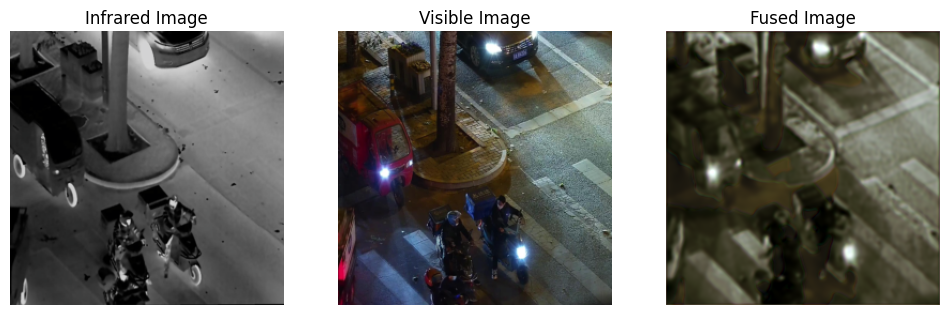

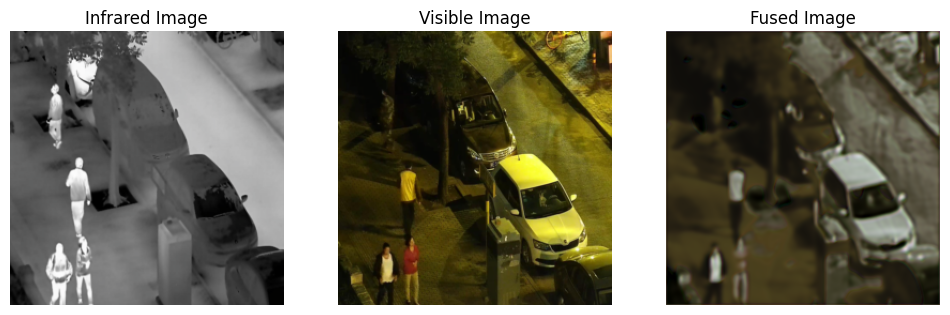

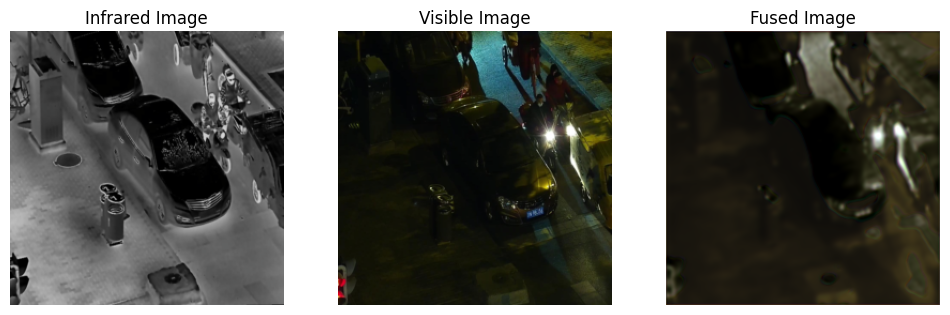

In [8]:
train_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/train'
train_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/train'
test_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/test'
test_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/test'
validation_dataset = InfraredVisibleDataset(test_infrared_dir, test_visible_dir, transform=val_transforms)

validation_subset_indices = np.random.choice(len(validation_dataset), size=subset_size, replace=False)
validation_subset = Subset(validation_dataset, validation_subset_indices)
validation_loader = DataLoader(validation_subset, batch_size=batch_size, shuffle=False)

# Fetch a batch of data from the validation_loader
infrared_imgs, visible_imgs = next(iter(validation_loader))

# Generate fused images
with torch.no_grad():
    fused_imgs = fusion_net(infrared_imgs, visible_imgs)

# Convert to NumPy arrays for display
# Assuming the images are on a GPU, move them back to CPU
infrared_imgs = infrared_imgs.cpu().numpy()
visible_imgs = visible_imgs.cpu().numpy()
fused_imgs = fused_imgs.cpu().numpy()
def convert_to_displayable_image(image):
    # Convert from PyTorch tensor layout (C, H, W)
    image = np.transpose(image, (1, 2, 0))
    # Undo normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = image * std + mean
    image = np.clip(image, 0, 1)
    return image
import matplotlib.pyplot as plt

# Number of images to display
num_images_to_display = 3

for i in range(num_images_to_display):
    plt.figure(figsize=(12, 4))

    # Display infrared image
    plt.subplot(1, 3, 1)
    plt.imshow(convert_to_displayable_image(infrared_imgs[i]), cmap='gray')
    plt.title("Infrared Image")
    plt.axis('off')

    # Display visible image
    plt.subplot(1, 3, 2)
    plt.imshow(convert_to_displayable_image(visible_imgs[i]), cmap='gray')
    plt.title("Visible Image")
    plt.axis('off')

    # Display fused image
    plt.subplot(1, 3, 3)
    plt.imshow(convert_to_displayable_image(fused_imgs[i]))
    plt.title("Fused Image")
    plt.axis('off')

    plt.show()


In [ ]:
# Load the images
infrared_image_path = '/path/to/infrared_image.jpg'
visible_image_path = '/path/to/visible_image.jpg'

infrared_image = Image.open(infrared_image_path).convert('RGB')
visible_image = Image.open(visible_image_path).convert('RGB')

# Preprocess the images
infrared_image = data_transforms(infrared_image).unsqueeze(0).to(device)
visible_image = data_transforms(visible_image).unsqueeze(0).to(device)

# Initialize the model
model = FusionNet().to(device)

# Forward pass through the model
fused_image = model(infrared_image, visible_image)

# Convert the fused image to a numpy array and transpose it to (H, W, C)
fused_image_np = fused_image.detach().cpu().numpy().transpose(1, 2, 0)

# Display the fused image
plt.imshow(fused_image_np)
plt.title('Fused Image')
plt.show()

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import Subset
import numpy as np
import torch
import torch.nn as nn
import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

import os
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset,Subset
import os
from PIL import Image
data_dir='/kaggle/input/rudradata/LLVIP/'
class InfraredVisibleDataset(Dataset):
    def __init__(self, infrared_dir, visible_dir, transform=None, mode='train'):
        self.infrared_dir = infrared_dir
        self.visible_dir = visible_dir
        self.transform = transform
        self.mode = mode
        self.file_names = [f for f in os.listdir(infrared_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        infrared_path = os.path.join(self.infrared_dir, file_name)
        visible_path = os.path.join(self.visible_dir, file_name)
        
        infrared_img = Image.open(infrared_path).convert('RGB')
        visible_img = Image.open(visible_path).convert('RGB')

        if self.mode == 'train' and self.transform:
            seed = torch.randint(0, 2**32, ())
            torch.manual_seed(seed)
            infrared_img = self.transform(infrared_img)
            torch.manual_seed(seed)
            visible_img = self.transform(visible_img)
        elif self.mode == 'val' and self.transform:
            infrared_img = self.transform(infrared_img)
            visible_img = self.transform(visible_img)

        return infrared_img, visible_img
# Training transformations with augmentation
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Validation transformations without augmentation
val_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define your data directories
train_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/train'
train_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/train'
test_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/test'
test_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/test'

# Create training and validation datasets
train_dataset = InfraredVisibleDataset(
    infrared_dir=train_infrared_dir,
    visible_dir=train_visible_dir,
    transform=train_transforms,
    mode='train'
)
val_dataset = InfraredVisibleDataset(
    infrared_dir=test_infrared_dir,
    visible_dir=test_visible_dir,
    transform=val_transforms,
    mode='val'
)
subset_size = 200
batch_size = 16
# Select a subset for training
subset_indices = np.random.choice(len(train_dataset), size=subset_size, replace=False)
train_subset = Subset(train_dataset, subset_indices)
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

class CNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CNN, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        # You can add more layers here if needed

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EncoderBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

class FusionModelBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(FusionModelBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DecoderBlock, self).__init__()
        self.conv_transpose = nn.ConvTranspose2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv_transpose(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x
class FusionFeature(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(FusionFeature, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(out_channels)
        self.relu1 = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        return x

# Assuming EncoderBlock and DecoderBlock definitions remain the same

class FusionNet(nn.Module):
    def __init__(self):
        super(FusionNet, self).__init__()

        # Encoder blocks
        self.encoder1 = EncoderBlock(in_channels=6, out_channels=32)
        self.encoder2 = EncoderBlock(in_channels=32, out_channels=64)
        self.encoder3 = EncoderBlock(in_channels=64, out_channels=128)
        self.encoder4 = EncoderBlock(in_channels=128, out_channels=256)

        # Fusion model block
        self.fusion_model_block = FusionModelBlock(in_channels=256, out_channels=256)

        # Fusion feature block
        self.fusion_feature = FusionFeature(in_channels=256, out_channels=256)

        # Decoder blocks
        self.decoder1 = DecoderBlock(in_channels=256, out_channels=128)
        self.decoder2 = DecoderBlock(in_channels=128, out_channels=64)
        self.decoder3 = DecoderBlock(in_channels=64, out_channels=32)
        self.decoder4 = DecoderBlock(in_channels=32, out_channels=16)
        self.final_conv = nn.Conv2d(16, 3, kernel_size=3, padding=1)

    def forward(self, ir, vis):
        x = torch.cat((ir, vis), dim=1)
        x = self.encoder1(x)
        x = self.encoder2(x)
        x = self.encoder3(x)
        x = self.encoder4(x)

        x = self.fusion_model_block(x)
        x = self.fusion_feature(x)

        x = self.decoder1(x)
        x = self.decoder2(x)
        x = self.decoder3(x)
        x = self.decoder4(x)
        output = self.final_conv(x)
        return output


import matplotlib.pyplot as plt
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
fusion_net = FusionNet()

# Move the model to the specified device
fusion_net = fusion_net.to(device)

criterion = nn.L1Loss()
optimizer = torch.optim.Adam(fusion_net.parameters(), lr=0.001)

num_epochs = 7
# Assuming validation_loader is defined and loaded with validation data

import matplotlib.pyplot as plt

# Initialize FusionNet, criterion, and optimizer
fusion_net = FusionNet()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(fusion_net.parameters(), lr=0.001)

num_epochs = 7
# Assuming validation_loader is defined and loaded with validation data
# Training loop
for epoch in range(num_epochs):
    fusion_net.train()
    running_loss = 0.0
    for i, (infrared_imgs, visible_imgs) in enumerate(train_loader):
        print(f"Processing batch {i + 1}/{len(train_loader)}")
        optimizer.zero_grad()
        outputs = fusion_net(infrared_imgs, visible_imgs)
        loss = criterion(outputs, visible_imgs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f"Batch {i + 1}, Loss: {loss.item()}")

    print(f"Epoch [{epoch + 1}/{num_epochs}], Avg Loss: {running_loss / len(train_loader)}")


Processing batch 1/13
Batch 1, Loss: 1.4011305570602417
Processing batch 2/13
Batch 2, Loss: 1.2374869585037231
Processing batch 3/13
Batch 3, Loss: 1.2674556970596313
Processing batch 4/13
Batch 4, Loss: 1.177752137184143
Processing batch 5/13
Batch 5, Loss: 1.0332533121109009
Processing batch 6/13
Batch 6, Loss: 1.0210933685302734
Processing batch 7/13
Batch 7, Loss: 0.9044880270957947
Processing batch 8/13
Batch 8, Loss: 0.9237913489341736
Processing batch 9/13
Batch 9, Loss: 0.8873985409736633
Processing batch 10/13
Batch 10, Loss: 0.760594367980957
Processing batch 11/13
Batch 11, Loss: 0.7354090809822083
Processing batch 12/13
Batch 12, Loss: 0.616645872592926
Processing batch 13/13
Batch 13, Loss: 0.71049565076828
Epoch [1/7], Avg Loss: 0.9751534553674551
Processing batch 1/13
Batch 1, Loss: 0.6216911673545837
Processing batch 2/13
Batch 2, Loss: 0.4713362753391266
Processing batch 3/13
Batch 3, Loss: 0.5175634026527405
Processing batch 4/13
Batch 4, Loss: 0.41593852639198303
Pr

In [9]:
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
import numpy as np

def calculate_metrics(fused_image, target_image):
    """
    Calculates various performance metrics between two images.

    Args:
        fused_image: The fused image.
        target_image: The target image.

    Returns:
        A tuple containing the following metrics:
            - EN: Error Norm
            - SD: Standard Deviation
            - SCD: Spectral Correlation Distance
            - SSIM: Structural Similarity Index
            - MI: Mutual Information
            - RMSE: Root Mean Squared Error
    """

    # Convert images to grayscale if needed
    if fused_image.shape[2] > 1 or target_image.shape[2] > 1:
        fused_image = fused_image.mean(axis=2)
        target_image = target_image.mean(axis=2)

    # Calculate Error Norm (EN)
    en = np.linalg.norm(fused_image - target_image)

    # Calculate Standard Deviation (SD)
    sd = np.std(fused_image - target_image)

    # Calculate Spectral Correlation Distance (SCD)
    scd = np.linalg.norm(np.fft.fft2(fused_image) - np.fft.fft2(target_image))

    # Calculate Structural Similarity Index (SSIM)
    ssim_value = ssim(fused_image, target_image, data_range=fused_image.max() - fused_image.min())

    # Calculate Mutual Information (MI)
    mi_value = mutual_information(fused_image.ravel(), target_image.ravel())

    # Calculate Root Mean Squared Error (RMSE)
    rmse_value = np.sqrt(mse(fused_image, target_image))

    return en, sd, scd, ssim_value, mi_value, rmse_value

def mutual_information(x, y):
    """
    Calculates the mutual information between two 1D arrays.

    Args:
        x: The first array.
        y: The second array.

    Returns:
        The mutual information between the two arrays.
    """

    # Calculate the joint histogram
    joint_hist, _, _ = np.histogram2d(x, y, bins=256)

    # Calculate the marginal histograms
    marg_x = np.sum(joint_hist, axis=1)
    marg_y = np.sum(joint_hist, axis=0)

    # Calculate the entropy of the joint distribution
    h_joint = -np.sum(joint_hist * np.log2(joint_hist + 1e-8))

    # Calculate the entropy of the marginal distributions
    h_x = -np.sum(marg_x * np.log2(marg_x + 1e-8))
    h_y = -np.sum(marg_y * np.log2(marg_y + 1e-8))

    # Calculate the mutual information
    mi = h_x + h_y - h_joint

    return mi

# Example usage:
fused_image = np.random.rand(256, 256, 3)
target_image = np.random.rand(256, 256, 3)
metrics = calculate_metrics(fused_image, target_image)

print("Error Norm (EN):", metrics[0])
print("Standard Deviation (SD):", metrics[1])
print("Spectral Correlation Distance (SCD):", metrics[2])
print("Structural Similarity Index (SSIM):", metrics[3])
print("Mutual Information (MI):", metrics[4])
print("Root Mean Squared Error (RMSE):", metrics[5])

Error Norm (EN): 60.091282495017204
Standard Deviation (SD): 0.2347313000146861
Spectral Correlation Distance (SCD): 15383.368318724397
Structural Similarity Index (SSIM): 0.025529252696911142
Mutual Information (MI): -1012933.4257920743
Root Mean Squared Error (RMSE): 0.23473157224616095


In [ ]:
class CNN(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(CNN, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=1, padding=1)
        self.batchnorm = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        # You can add more layers here if needed

    def forward(self, x):
        x = self.conv(x)
        x = self.batchnorm(x)
        x = self.relu(x)
        return x

In [2]:
pip install pytorch-ssim

  Preparing metadata (setup.py) ... done
  Created wheel for pytorch-ssim: filename=pytorch_ssim-0.1-py3-none-any.whl size=2002 sha256=166886f93941b738e067c7cda7bcd0203f6606d5ae22b3bda771f7f2a3b527ae
  Stored in directory: /root/.cache/pip/wheels/2e/0c/10/4a3f91bd610b23196f1e28f8af80b3ec86786b50f3e86dc21e
Successfully built pytorch-ssim
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


Batch 1, Train Loss: 3.721297264099121
Batch 11, Train Loss: 3.317389488220215
Batch 21, Train Loss: 3.510338068008423
Batch 1, Validation Loss: 3.6094765663146973
Batch 11, Validation Loss: 1.8508793115615845
Batch 21, Validation Loss: 1.3013490438461304
Epoch 1, Train Loss: 6.266850299835205, Val Loss: 2.041429033279419
Batch 1, Train Loss: 1.3760955333709717
Batch 11, Train Loss: 1.3745290040969849
Batch 21, Train Loss: 1.2590359449386597
Batch 1, Validation Loss: 0.9723832607269287
Batch 11, Validation Loss: 1.0666977167129517
Batch 21, Validation Loss: 0.9713072776794434
Epoch 2, Train Loss: 1.2370810508728027, Val Loss: 1.0266893267631532
Batch 1, Train Loss: 0.9090398550033569
Batch 11, Train Loss: 0.9569510221481323
Batch 21, Train Loss: 0.8835250735282898
Batch 1, Validation Loss: 0.9319475889205933
Batch 11, Validation Loss: 0.9481805562973022
Batch 21, Validation Loss: 0.7319886684417725
Epoch 3, Train Loss: 0.9261413836479186, Val Loss: 0.8661102962493896
Batch 1, Train Los

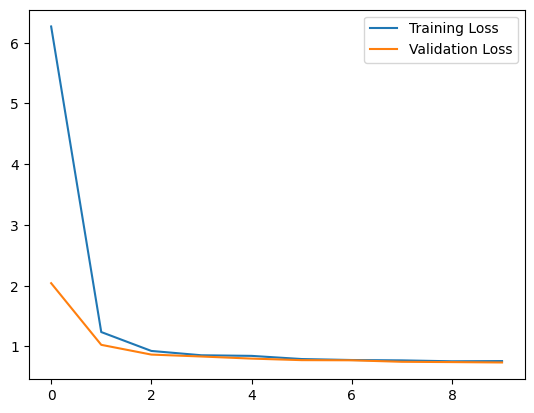

In [18]:
import torch
import torch.nn as nn
import pytorch_ssim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset
import os
from PIL import Image
data_dir = '/kaggle/input/rudradata/LLVIP/'

class InfraredVisibleDataset(Dataset):
    def __init__(self, infrared_dir, visible_dir, transform=None, mode='train'):
        self.infrared_dir = infrared_dir
        self.visible_dir = visible_dir
        self.transform = transform
        self.mode = mode
        self.file_names = [f for f in os.listdir(infrared_dir) if f.endswith('.jpg')]

    def __len__(self):
        return len(self.file_names)

    def __getitem__(self, idx):
        file_name = self.file_names[idx]
        infrared_path = os.path.join(self.infrared_dir, file_name)
        visible_path = os.path.join(self.visible_dir, file_name)

        infrared_img = Image.open(infrared_path).convert('RGB')
        visible_img = Image.open(visible_path).convert('RGB')

        if self.mode == 'train' and self.transform:
            seed = torch.randint(0, 2**32, ())
            torch.manual_seed(seed)
            infrared_img = self.transform(infrared_img)
            torch.manual_seed(seed)
            visible_img = self.transform(visible_img)
        elif self.mode == 'val' and self.transform:
            infrared_img = self.transform(infrared_img)
            visible_img = self.transform(visible_img)

        return infrared_img, visible_img

# Training transformations with augmentation
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Validation transformations without augmentation
val_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define your data directories
train_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/train'
train_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/train'
test_infrared_dir = '/kaggle/input/rudradata/LLVIP/infrared/test'
test_visible_dir = '/kaggle/input/rudradata/LLVIP/visible/test'

# Create training and validation datasets
train_dataset = InfraredVisibleDataset(
    infrared_dir=train_infrared_dir,
    visible_dir=train_visible_dir,
    transform=train_transforms,
    mode='train'
)
val_dataset = InfraredVisibleDataset(
    infrared_dir=test_infrared_dir,
    visible_dir=test_visible_dir,
    transform=val_transforms,
    mode='val'
)
import torch
import torch.nn.functional as F
from math import exp

def gaussian(window_size, sigma):
    gauss = torch.Tensor([exp(-(x - window_size // 2) ** 2 / float(2 * sigma ** 2)) for x in range(window_size)])
    return gauss / gauss.sum()

def create_window(window_size, channel):
    _1D_window = gaussian(window_size, 1.5).unsqueeze(1)
    _2D_window = _1D_window.mm(_1D_window.t()).float().unsqueeze(0).unsqueeze(0)
    window = _2D_window.expand(channel, 1, window_size, window_size).contiguous()
    return window

def ssim(img1, img2, window_size=11, size_average=True):
    window = create_window(window_size, img1.size(1))
    padding = window_size // 2
    mu1 = F.conv2d(img1, window, padding=window_size // 2, groups=img1.size(1))
    mu2 = F.conv2d(img2, window, padding=window_size // 2, groups=img2.size(1))

    padding = window_size // 2

    
    channel=img1.size(1)
    mu1_sq = mu1.pow(2)
    mu2_sq = mu2.pow(2)
    mu1_mu2 = mu1 * mu2

    sigma1_sq = F.conv2d(img1 * img1, window, padding=padding, groups=channel) - mu1_sq
    sigma2_sq = F.conv2d(img2 * img2, window, padding=padding, groups=channel) - mu2_sq
    sigma12 = F.conv2d(img1 * img2, window, padding=padding, groups=channel) - mu1_mu2

    C1 = (0.01 * window_size) ** 2
    C2 = (0.03 * window_size) ** 2

    ssim_map = ((2 * mu1_mu2 + C1) * (2 * sigma12 + C2)) / ((mu1_sq + mu2_sq + C1) * (sigma1_sq + sigma2_sq + C2))

    if size_average:
        return ssim_map.mean()
    else:
        return ssim_map

class EncoderLoss(nn.Module):
    def __init__(self, alpha=0.5):
        super(EncoderLoss, self).__init__()
        self.alpha = alpha

    def forward(self, output, target):
        mse_loss = F.mse_loss(output, target)
        ssim_loss = 1 - ssim(output, target)  # Using the fixed SSIM function
        loss = (1 - self.alpha) * mse_loss + self.alpha * ssim_loss
        return loss



class FusionLoss(nn.Module):
    def __init__(self, alpha, beta, mu, rho):
        super(FusionLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.mu = mu
        self.rho = rho

    def forward(self, fused, infrared, visible):
        L_ssim = 1 - ssim(fused, visible)
        
        # Placeholder for the salience map (M_sal)
        # Here we compute a simple saliency map based on the difference between infrared and visible images
        # This is a naive approach, you might need a more sophisticated saliency map calculation
        M_sal = torch.abs(infrared - visible)
        M_sal = M_sal / M_sal.max()  # Normalize the saliency map

        # Calculate the salience loss
        L_sal = F.mse_loss(M_sal * fused, M_sal * infrared) + F.mse_loss((1 - M_sal) * fused, (1 - M_sal) * visible)

        # Placeholder for multi-modal feature losses
        L_df = torch.tensor(0.0, device=fused.device)  # Detail feature loss
        L_sf = torch.tensor(0.0, device=fused.device)  # Structure feature loss
        L_rf = torch.tensor(0.0, device=fused.device)  # Region feature loss
        
        # Multi-modal feature loss
        L_fea = L_df + self.mu * L_sf + self.rho * L_rf

        # Total fusion loss
        total_loss = self.alpha * L_ssim + self.beta * L_fea + L_sal
        return total_loss


class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(EncoderBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)

        self.relu = nn.ReLU(inplace=True)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x_pooled = self.pool(x)
        return x, x_pooled

class DecoderBlock(nn.Module):
    def __init__(self, in_channels, skip_channels, middle_channels, out_channels):
        super(DecoderBlock, self).__init__()
        self.up = nn.ConvTranspose2d(in_channels, middle_channels, kernel_size=2, stride=2)
        self.conv1 = nn.Conv2d(middle_channels + skip_channels, middle_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(middle_channels, out_channels, kernel_size=3, padding=1)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x, skip_connection):
        x = self.up(x)
        x = torch.cat((x, skip_connection), dim=1)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        return x
# Define the Feature Fusion Module
class FeatureFusionModule(nn.Module):
    def __init__(self, in_channels):
        super(FeatureFusionModule, self).__init__()
        self.conv = nn.Conv2d(in_channels, in_channels, kernel_size=3, padding=1)

    def forward(self, infrared_features, visible_features):
        # Concatenate features along the channel dimension
        fused_features = torch.cat([infrared_features, visible_features], dim=1)

        # Apply a convolution to combine the features
        fused_features = self.conv(fused_features)
        return fused_features
        return fused_features
class TransformerBlock(nn.Module):
    def __init__(self, feature_size, num_heads, num_layers, dropout_rate=0.1):
        super(TransformerBlock, self).__init__()
        self.layer_norm = nn.LayerNorm(feature_size)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=feature_size,
            nhead=num_heads,
            dropout=dropout_rate
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, x):
        # Flatten NxCxHxW to HWxNxC
        x = x.flatten(2).permute(2, 0, 1)
        x = self.layer_norm(x)
        x = self.transformer_encoder(x)
        # Un-flatten HWxNxC back to NxCxHxW
        H, W = int(x.size(0) ** 0.5), int(x.size(0) ** 0.5)
        x = x.permute(1, 2, 0).view(-1, x.size(-1), H, W)
        return x     

# Define the VisionTransformerFusionBlock with the correct input and output channels
class VisionTransformerFusionBlock(nn.Module):
    def __init__(self, img_dim, patch_dim, in_channels, hidden_dim, num_heads, num_layers, dropout_rate=0.1):
        super(VisionTransformerFusionBlock, self).__init__()
        num_patches = (img_dim // patch_dim) * (img_dim // patch_dim)
        self.patch_dim = patch_dim
        self.pos_embedding = nn.Parameter(torch.zeros(1, num_patches + 1, hidden_dim))
        self.patch_to_embedding = nn.Linear(patch_dim * patch_dim * in_channels, hidden_dim)
        self.cls_token = nn.Parameter(torch.zeros(1, 1, hidden_dim))
        self.transformer_block = TransformerBlock(
            feature_size=hidden_dim,
            num_heads=num_heads,
            num_layers=num_layers,
            dropout_rate=dropout_rate
        )
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(hidden_dim),
            nn.Linear(hidden_dim, in_channels)
        )

    def forward(self, x):
        # Flatten and embed the patches
        B, C, H, W = x.shape
        x = x.view(B, C, H // self.patch_dim, self.patch_dim, W // self.patch_dim, self.patch_dim)
        x = x.permute(0, 2, 4, 3, 5, 1).flatten(1, 3)
        x = self.patch_to_embedding(x)

        # Add the CLS token
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)

        # Add positional embeddings and perform transformer operations
        x += self.pos_embedding
        x = self.transformer_block(x)

        # Project back to image channels
        x = self.mlp_head(x[:, 0])
        x = x.view(B, C, H, W)
        return x
# CNN Block for Feature Enhancement
class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super(CNNBlock, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class FusionNet(nn.Module):
    def __init__(self):
        super(FusionNet, self).__init__()
        # Color normalization layers
        self.ir_norm = nn.BatchNorm2d(3)
        self.vis_norm = nn.BatchNorm2d(3)
        self.encoder1 = EncoderBlock(3, 64)
        self.encoder2 = EncoderBlock(64, 128)
        self.encoder3 = EncoderBlock(128, 256)
        self.encoder4 = EncoderBlock(256, 512)
        self.attention = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=1),  # Adjusted to accept 512 channels as input
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=1),  # Adjusted to output 512 channels
            nn.Sigmoid()
        )
         # New CNN Block for feature enhancement
        self.feature_enhancement_cnn = CNNBlock(512, 512)

        # Initialize the Vision Transformer Fusion Block
        self.transformer_fusion_block = VisionTransformerFusionBlock(
            img_dim=256,  # Assuming input images are 256x256
            patch_dim=16,  # Size of each image patch
            in_channels=512,  # Number of output channels from the last encoder block
            hidden_dim=768,  # Dimension of the transformer hidden layers
            num_heads=12,  # Number of attention heads
            num_layers=6  # Number of transformer layers
        )

        # Initialize standard Transformer Block
        self.transformer = TransformerBlock(
            feature_size=512,  # Feature size must match the output of the last encoder block
            num_heads=8,  # Number of attention heads in the transformer
            num_layers=4  # Number of transformer layers
        )
        
        self.decoder1 = DecoderBlock(512, 512, 256, 256)  # Adjust the channels here
        self.decoder2 = DecoderBlock(256, 256, 128, 128)  # Adjust the channels here
        self.decoder3 = DecoderBlock(128, 128, 64, 64)  # Adjust the channels here
        self.decoder4 = DecoderBlock(64, 64, 32, 32)  # Adjust the channels here
        
        self.final_conv = nn.Conv2d(32, 3, kernel_size=1)

    def forward(self, infrared_img, visible_img):
        infrared_img = self.ir_norm(infrared_img)
        visible_img = self.vis_norm(visible_img)
        # Encoder path
        skip1, x = self.encoder1(infrared_img)
        skip2, x = self.encoder2(x)
        skip3, x = self.encoder3(x)
        skip4, x = self.encoder4(x)
        # Attention mechanism
        attention = self.attention(x)
        x = x * attention
        # Feature enhancement using CNN Block
        x = self.feature_enhancement_cnn(x)

        # Transformer fusion block
        x = self.transformer(x)
        
        

        # Decoder path
        x = self.decoder1(x, skip4)
        x = self.decoder2(x, skip3)
        x = self.decoder3(x, skip2)
        x = self.decoder4(x, skip1)

        x = self.final_conv(x)
        return x
import numpy as np
from torch.utils.data import DataLoader, Dataset, Subset
import numpy as np
import os
from PIL import Image
from torchvision import transforms


# Instantiate the FusionNet model
fusion_net = FusionNet()

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
fusion_net = fusion_net.to(device)
# Training and validation execution
optimizer = torch.optim.Adam(fusion_net.parameters(), lr=0.001)
total_epochs = 10
num_epochs = 3
batch_size = 16
subset_size = 400
# Define the loss function
loss_fn = EncoderLoss(alpha=0.5)
fusion_loss = FusionLoss(alpha=0.5, beta=0.5, mu=0.1, rho=0.1)

train_dataset = InfraredVisibleDataset(train_infrared_dir, train_visible_dir, transform=train_transforms)
validation_dataset = InfraredVisibleDataset(test_infrared_dir, test_visible_dir, transform=val_transforms)

# Create training and validation subsets
train_subset_indices = np.random.choice(len(train_dataset), size=subset_size, replace=False)
train_subset = Subset(train_dataset, train_subset_indices)
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)

validation_subset_indices = np.random.choice(len(validation_dataset), size=subset_size, replace=False)
validation_subset = Subset(validation_dataset, validation_subset_indices)
validation_loader = DataLoader(validation_subset, batch_size=batch_size, shuffle=False)

# Define loss functions
encoder_loss_fn = EncoderLoss(alpha=0.5).to(device)
fusion_loss_fn = FusionLoss(alpha=0.5, beta=0.5, mu=0.1, rho=0.1).to(device)

# Define the optimizer
optimizer = torch.optim.Adam(fusion_net.parameters(), lr=0.001)

# Training loop function that uses both EncoderLoss and FusionLoss
def train_one_epoch(model, train_loader, optimizer, device, encoder_loss_fn, fusion_loss_fn):
    model.train()
    total_loss = 0
    for batch_idx, (infrared_img, visible_img) in enumerate(train_loader):
        infrared_img, visible_img = infrared_img.to(device), visible_img.to(device)
        optimizer.zero_grad()
        
        # Forward pass
        fused_img = model(infrared_img, visible_img)
        
        # Compute the losses
        encoder_loss = encoder_loss_fn(fused_img, infrared_img)
        fusion_loss = fusion_loss_fn(fused_img, infrared_img, visible_img)
        
        # Combine losses
        loss = encoder_loss + fusion_loss
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        if batch_idx % 10 == 0:
            print(f"Batch {batch_idx+1}, Train Loss: {loss.item()}")
            
    return total_loss / len(train_loader)

# Validation loop function (should be updated accordingly)
def validate_model(model, validation_loader, optimizer, device, encoder_loss_fn, fusion_loss_fn):
    model.eval()
    total_loss = 0
    for batch_idx, (infrared_img, visible_img) in enumerate(validation_loader):
        infrared_img, visible_img = infrared_img.to(device), visible_img.to(device)
        optimizer.zero_grad()
        

        #Forward pass
        fused_img = model(infrared_img, visible_img)
        
        # Compute the losses
        encoder_loss = encoder_loss_fn(fused_img, infrared_img)
        fusion_loss = fusion_loss_fn(fused_img, infrared_img, visible_img)
        
        # Combine losses
        loss = encoder_loss + fusion_loss
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        if batch_idx % 10 == 0:
            print(f"Batch {batch_idx+1}, Validation Loss: {loss.item()}")
            
    return total_loss / len(validation_loader)
# ...

# Training execution loop
train_losses = []
val_losses = []
total_epochs = 10

for epoch in range(total_epochs):
    train_loss = train_one_epoch(fusion_net, train_loader, optimizer, device, encoder_loss_fn, fusion_loss_fn)
    train_losses.append(train_loss)
    
    # val_loss = ... (call your updated validation function)
    val_loss = validate_model(fusion_net, train_loader, optimizer, device, encoder_loss_fn, fusion_loss_fn)
    val_losses.append(val_loss)

    print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Val Loss: {val_loss}")
    
    







# Plot training and validation losses
import matplotlib.pyplot as plt
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.legend()
plt.show()

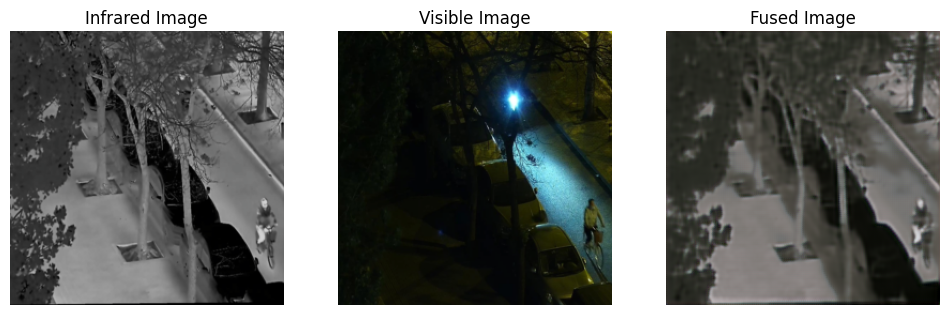

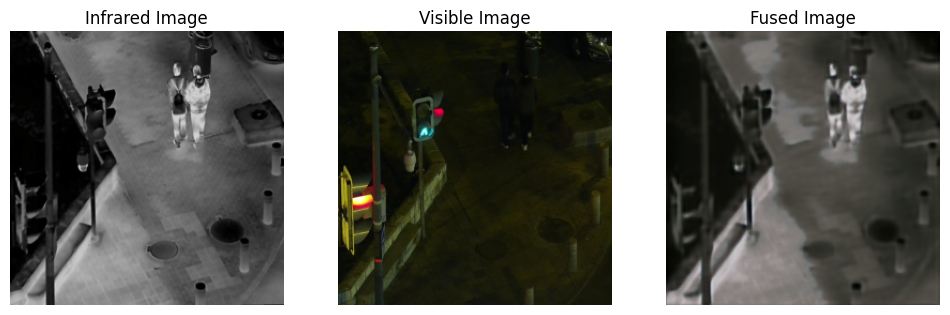

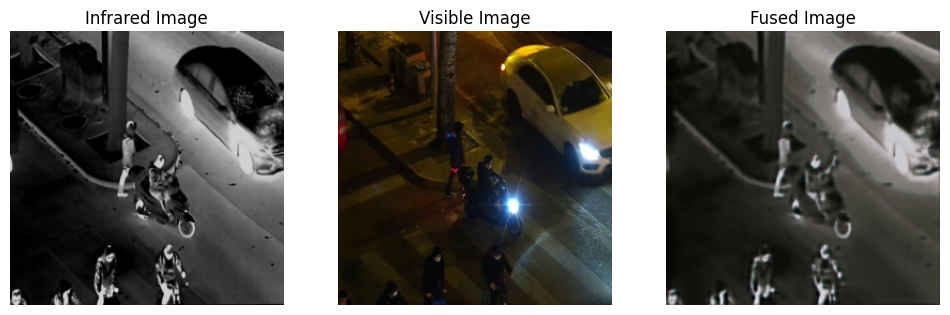

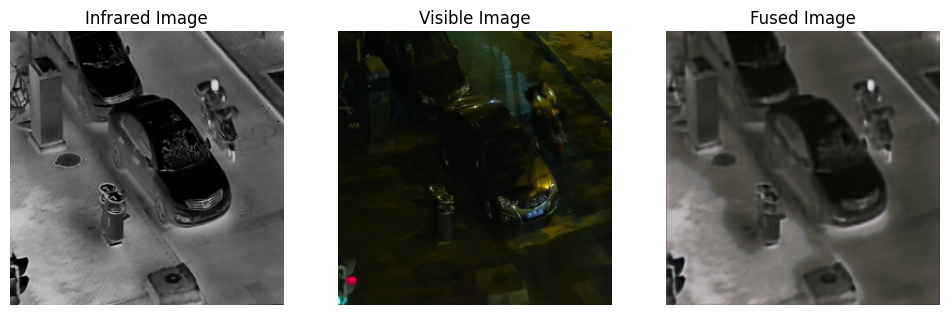

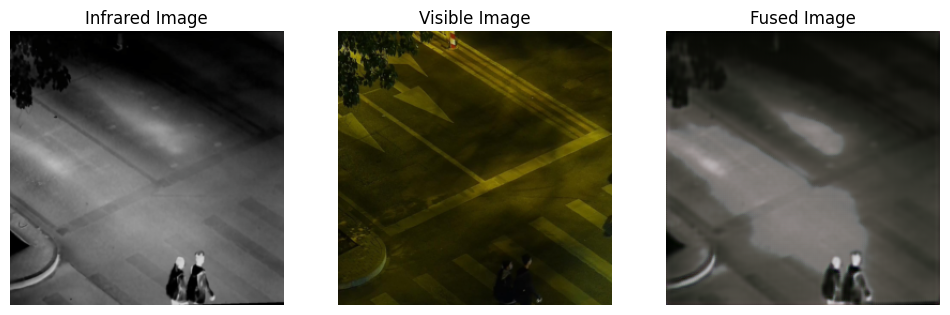

In [19]:
# Fetch a batch of data from the validation_loader
infrared_imgs, visible_imgs = next(iter(validation_loader))

# Generate fused images
with torch.no_grad():
    fused_imgs = fusion_net(infrared_imgs, visible_imgs)

# Convert to NumPy arrays for display
# Assuming the images are on a GPU, move them back to CPU
infrared_imgs = infrared_imgs.cpu().numpy()
visible_imgs = visible_imgs.cpu().numpy()
fused_imgs = fused_imgs.cpu().numpy()
def convert_to_displayable_image(image):
    # Convert from PyTorch tensor layout (C, H, W)
    image = np.transpose(image, (1, 2, 0))
    # Undo normalization
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = image * std + mean
    image = np.clip(image, 0, 1)
    return image
import matplotlib.pyplot as plt

# Number of images to display
num_images_to_display = 5

for i in range(num_images_to_display):
    plt.figure(figsize=(12, 4))

    # Display infrared image
    plt.subplot(1, 3, 1)
    plt.imshow(convert_to_displayable_image(infrared_imgs[i]), cmap='gray')
    plt.title("Infrared Image")
    plt.axis('off')

    # Display visible image
    plt.subplot(1, 3, 2)
    plt.imshow(convert_to_displayable_image(visible_imgs[i]), cmap='gray')
    plt.title("Visible Image")
    plt.axis('off')

    # Display fused image
    plt.subplot(1, 3, 3)
    plt.imshow(convert_to_displayable_image(fused_imgs[i]))
    plt.title("Fused Image")
    plt.axis('off')

In [20]:
pip install sewar

  Preparing metadata (setup.py) ... done
  Created wheel for sewar: filename=sewar-0.4.6-py3-none-any.whl size=11420 sha256=5c3ade0bc222c3576f419e5dc2bcb83023c6b1187c435aef24a07ae935bf75eb
  Stored in directory: /root/.cache/pip/wheels/3f/af/02/9c6556ba287b62a945d737def09b8b8c35c9e1d82b9dfae84c
Successfully built sewar
Note: you may need to restart the kernel to use updated packages.


In [22]:
import numpy as np
import torch
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mutual_info_score
from sewar.full_ref import vifp
import numpy as np
import torch
from torch.utils.data import DataLoader
from skimage.metrics import structural_similarity as ssim
from sklearn.metrics import mutual_info_score
def contrast(image):
    """
    Calculate the contrast of an image as its standard deviation.
    """
    return np.std(image)
# Define the metrics calculation functions
def entropy(image):
    _, counts = np.unique(image, return_counts=True)
    probabilities = counts / counts.sum()
    return -np.sum(probabilities * np.log2(probabilities))

def spatial_frequency(image):
    frequencies = []
    for channel in range(image.shape[2]):
        gx, gy = np.gradient(image[:, :, channel])
        sf = np.sqrt(gx**2 + gy**2)
        frequencies.append(sf.mean())
    return np.mean(frequencies)

def average_gradient(image):
    gradients = []
    for channel in range(image.shape[2]):
        gx, gy = np.gradient(image[:, :, channel])
        ag = np.sqrt(gx**2 + gy**2)
        gradients.append(ag.mean())
    return np.mean(gradients)

def standard_deviation(image):
    return np.std(image)

def psnr(imageA, imageB):
    mse = np.mean((imageA - imageB) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

def contrast_improvement_index(fused_image, input_images):
    fused_contrast = contrast(fused_image)
    input_contrasts = [contrast(img) for img in input_images]
    avg_input_contrast = np.mean(input_contrasts)
    return (fused_contrast - avg_input_contrast) / avg_input_contrast

def rmse(imageA, imageB):
    return np.sqrt(np.mean((imageA - imageB) ** 2))

def mutual_information(imageA, imageB):
    hist_2d, _, _ = np.histogram2d(imageA.ravel(), imageB.ravel(), bins=20)
    return mutual_info_score(None, None, contingency=hist_2d)

def cross_correlation(imageA, imageB):
    return np.mean((imageA - np.mean(imageA)) * (imageB - np.mean(imageB))) / (np.std(imageA) * np.std(imageB))

def spectral_color_distance(imageA, imageB):
    # Placeholder implementation, replace with actual SCD calculation
    return np.sqrt(np.sum((imageA - imageB) ** 2))

# Define the calculate_metrics function
def calculate_metrics(model, data_loader, device):
    model.eval()
    metrics = {
        "Entropy": [],
        "Spatial Frequency": [],
        "Average Gradient": [],
        "Standard Deviation": [],
        "PSNR": [],
        "CII": [],
        "RMSE": [],
        "MI": [],
        "CC": [],
        "VIF": [],
        "SCD": []
    }

    with torch.no_grad():
        for infrared_img, visible_img in data_loader:
            infrared_img, visible_img = infrared_img.to(device), visible_img.to(device)
            fused_img = model(infrared_img, visible_img).cpu().numpy()
            visible_img_np = visible_img.cpu().numpy()

            for i in range(fused_img.shape[0]):
                fused = fused_img[i].transpose(1, 2, 0)
                visible = visible_img_np[i].transpose(1, 2, 0)

                metrics["Entropy"].append(entropy(fused))
                metrics["Spatial Frequency"].append(spatial_frequency(fused))
                metrics["Average Gradient"].append(average_gradient(fused))
                metrics["Standard Deviation"].append(standard_deviation(fused))
                metrics["PSNR"].append(psnr(fused, visible))
                metrics["CII"].append(contrast_improvement_index(fused, [visible]))
                metrics["RMSE"].append(rmse(fused, visible))
                metrics["MI"].append(mutual_information(fused, visible))

                metrics["CC"].append(cross_correlation(fused, visible))
                metrics["VIF"].append(vifp(visible, fused))
                metrics["SCD"].append(spectral_color_distance(fused, visible))

    average_metrics = {metric: np.nanmean(values) for metric, values in metrics.items()}
    return average_metrics

# Calculate metrics
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
average_metrics = calculate_metrics(fusion_net, validation_loader, device)

# Print or plot the average metrics
print("Average Metrics:")
for metric, value in average_metrics.items():
    print(f"{metric}: {value}")

Average Metrics:
Entropy: 17.57609874701609
Spatial Frequency: 0.07623369991779327
Average Gradient: 0.07623369991779327
Standard Deviation: 0.7627835869789124
PSNR: 47.144068639457984
CII: 0.7011259198188782
RMSE: 1.1300709247589111
MI: 0.150736188650009
CC: 0.14405320584774017
VIF: 0.237484813086213
SCD: 501.0791320800781


In [23]:
print("Performance Metrics:")
for metric, value in average_metrics.items():
    print(f"{metric}: {value}")

Performance Metrics:
Entropy: 17.57609874701609
Spatial Frequency: 0.07623369991779327
Average Gradient: 0.07623369991779327
Standard Deviation: 0.7627835869789124
PSNR: 47.144068639457984
CII: 0.7011259198188782
RMSE: 1.1300709247589111
MI: 0.150736188650009
CC: 0.14405320584774017
VIF: 0.237484813086213
SCD: 501.0791320800781
